<a href="https://colab.research.google.com/github/Jeffrey-Moon/Trend_of_Stocks_Before_and_After_COVID-19/blob/master/Moon%2C_Jeffrey_Python_3_Portfolio_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RSI and MACD

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rc
import datetime

rc('figure', figsize=(10, 9))
style.use('ggplot')

In [ ]:
start = '2017-08-14'
end = '2019-08-13'
target_stock = 'BAC'

target_stock_data = pdr.data.DataReader(target_stock, 'yahoo', start, end)

def plot_ma(stock_data):
  ma_20 = stock_data['Adj Close'].rolling(window=20).mean()
  ma_60 = stock_data['Adj Close'].rolling(window=60).mean()

  stock_data['Adj Close'].plot(label='Daily Price')
  ma_20.plot(label='20 MA')
  ma_60.plot(label='60 MA')

def plot_bollinger_band(stock_data, window, multiplier):
  adj_high = stock_data['Adj Close']*(stock_data['High']/stock_data['Close'])
  adj_low = stock_data['Adj Close']*(stock_data['Low']/stock_data['Close'])
  typ_price = (adj_high+stock_data['Adj Close']+adj_low)/3
  typ_price_ma_20 = typ_price.rolling(window=window).mean()
  typ_price_std = typ_price.rolling(window=window).std()

  bolu = typ_price + multiplier*typ_price_std
  boll = typ_price - multiplier*typ_price_std

  stock_data['Adj Close'].plot(label='Daily Price')
  bolu.plot(label='Bollinger Upper Bound')
  boll.plot(label='Bollinger Lower Bound')

def macd(stock_data):
  short_exponential_moving_average = stock_data['Adj Close'].ewm(span=12, adjust=False).mean()
  long_exponential_moving_average = stock_data['Adj Close'].ewm(span=26, adjust=False).mean()
  macd = short_exponential_moving_average - long_exponential_moving_average
  signal = macd.ewm(span=9, adjust=False).mean()
  diff = macd - signal

  diff.plot(label = 'MACD - Signal')

def rsi(stock_data, window):
  diff = stock_data['Adj Close'] - stock_data['Adj Close'].shift(1)
  up = diff.where(diff>0)
  down = diff.where(diff<0)
  up.fillna(0, inplace = True)
  down.fillna(0, inplace = True)
  au = up.rolling(window = window).sum()/window
  ad = -down.rolling(window = window).sum()/window
  rs = au/ad
  rsi = rs/(1 +rs)
  rsi_signal = rsi.ewm(span = 9, adjust=False).mean()

  rsi_signal.plot(label = 'RSI Signal')
  rsi.plot(label = 'RSI')

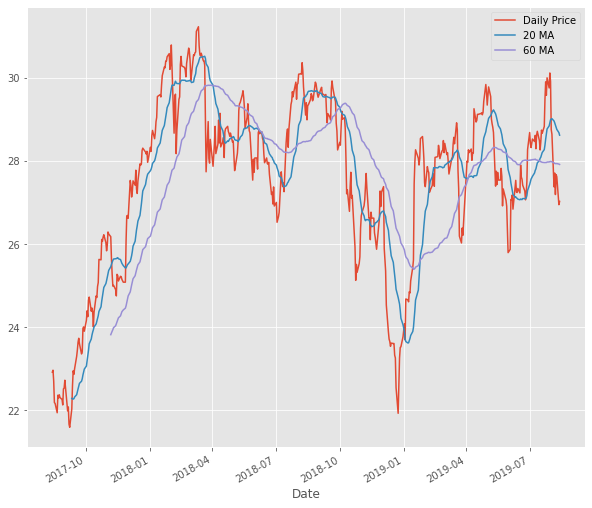

In [ ]:
plot_ma(target_stock_data)

plt.legend()
plt.show()

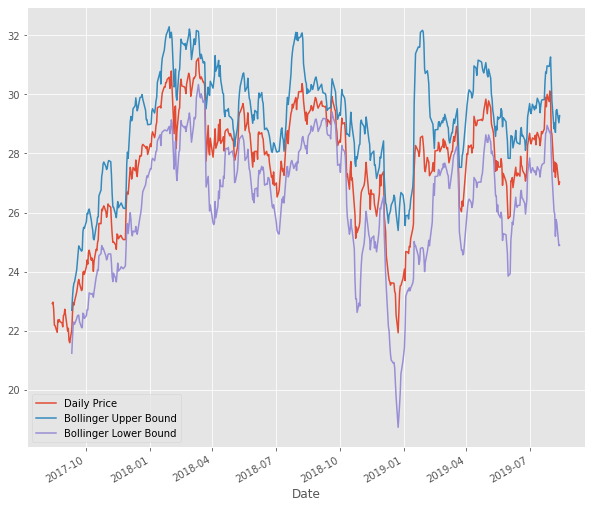

In [ ]:
win = 20
mltp = 2

plot_bollinger_band(target_stock_data, win, mltp)

plt.legend()
plt.show()

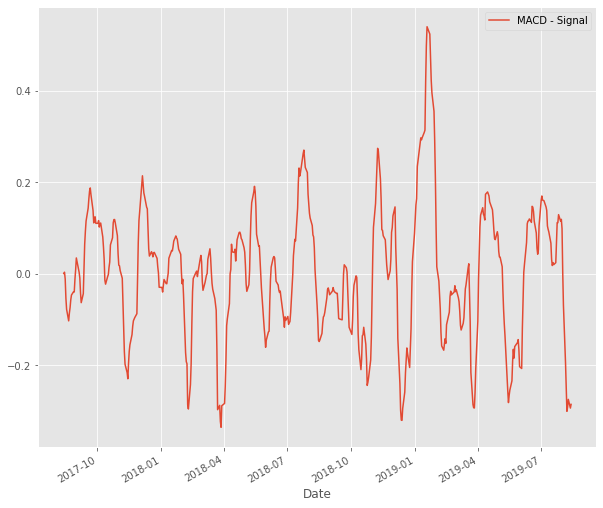

In [ ]:
macd(target_stock_data)

plt.legend()
plt.show()

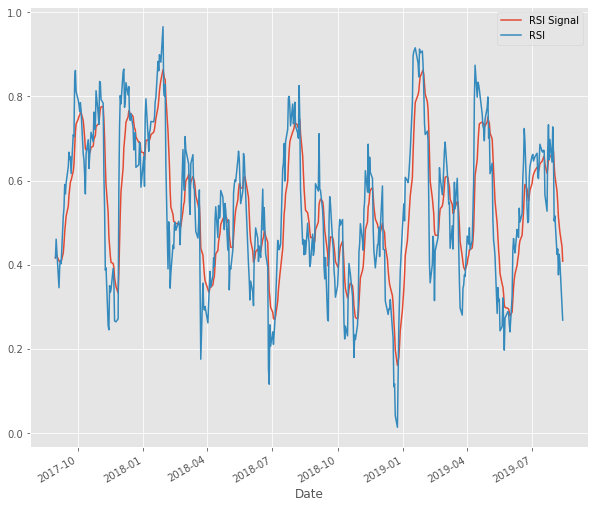

In [ ]:
window = 14

rsi(target_stock_data, 14)

plt.legend()
plt.show()

### Corona Befroe & After

In [ ]:
start_jan = '2020-1-01'
end_jan = '2020-1-31'
start_feb = '2020-2-01'
end_feb = '2020-2-29'
start_mar = '2020-3-01'
end_mar = '2020-3-31'
start_apr = '2020-4-01'
end_apr = '2020-4-30'
start_list = ['start_jan', 'start_feb', 'start_mar', 'start_apr']
end_list = ['end_jan', 'end_feb', 'end_mar', 'end_apr']
target_stock = ['^IXIC', '^GSPC']


def stock_data_volume(target_stock, start_date, end_date):
  target_stock_data = pdr.data.DataReader(target_stock, 'yahoo', start_date, end_date)
  target_stock_volume = target_stock_data['Volume']

  if start_date == start_jan and end_date == end_jan:
    plt.hist(target_stock_volume, facecolor='red', bins = 15, alpha= 0.3)
  elif start_date == start_feb and end_date == end_feb:
    plt.hist(target_stock_volume, facecolor='blue', bins = 15, alpha= 0.3)
  elif start_date == start_mar and end_date == end_mar:
    plt.hist(target_stock_volume, facecolor='green', bins = 15, alpha= 0.3)
  elif start_date == start_apr and end_date == end_apr:
    plt.hist(target_stock_volume, facecolor='yellow', bins = 15, alpha= 0.3)

def stock_rsi(target_stock, window):
  diff = stock_data['Adj Close'] - stock_data['Adj Close'].shift(1)
  up = diff.where(diff>0)
  down = diff.where(diff<0)
  up.fillna(0, inplace = True)
  down.fillna(0, inplace = True)
  au = up.rolling(window = window).sum()/window
  ad = -down.rolling(window = window).sum()/window
  rs = au/ad
  rsi = rs/(1 +rs)
  rsi_signal = rsi.ewm(span = 9, adjust=False).mean()

  rsi_signal.plot(label = 'RSI Signal')
  rsi.plot(label = 'RSI')

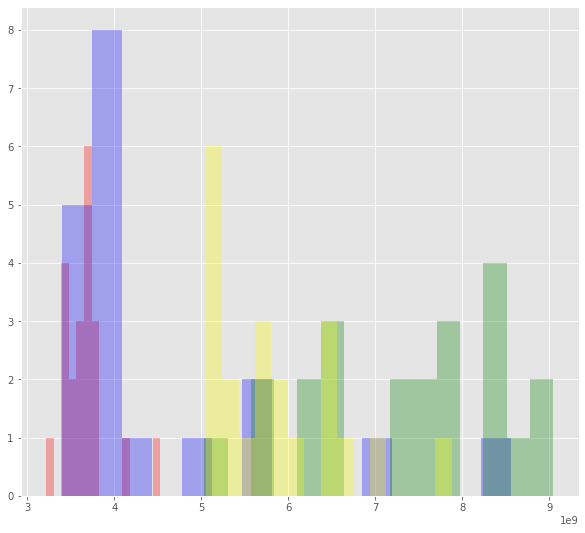

In [ ]:
stock_data_volume('^GSPC',start_jan, end_jan)
stock_data_volume('^GSPC',start_feb, end_feb)
stock_data_volume('^GSPC',start_mar, end_mar)
stock_data_volume('^GSPC',start_apr, end_apr)

### Using List

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rc
from matplotlib import axes

# matplotlib.axes.Axes


rc('figure', figsize=(10, 9))
style.use('ggplot')

In [ ]:
def diff_between_two_days(stock_data):
  diff = stock_data['Adj Close']-stock_data['Adj Close'].shift(1)
  diff.hist(facecolor='red', bins = 15, alpha= 0.3, range = [-1000,1000])
  plt.show()

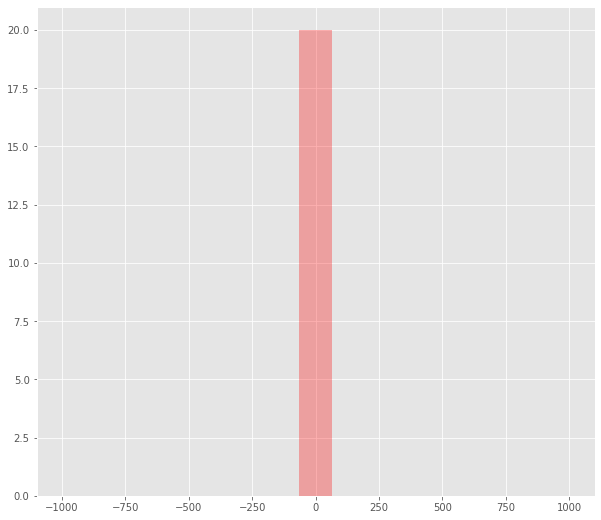

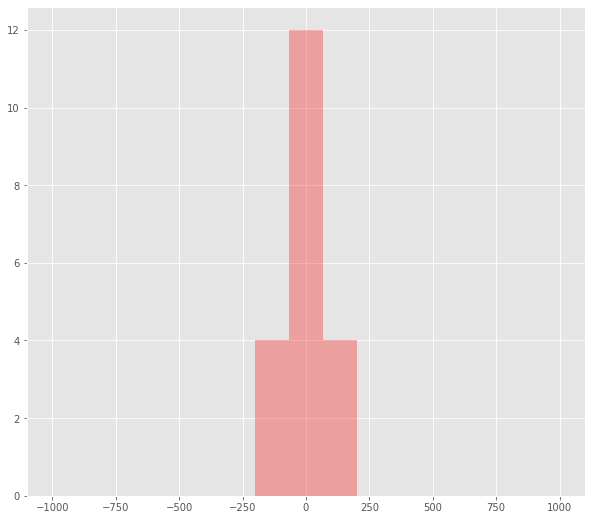

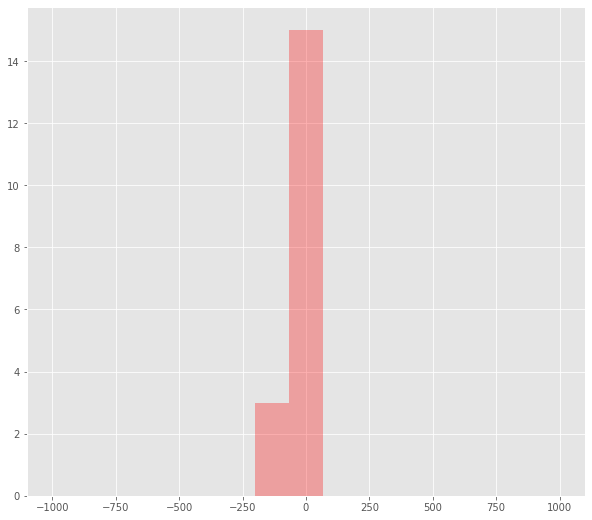

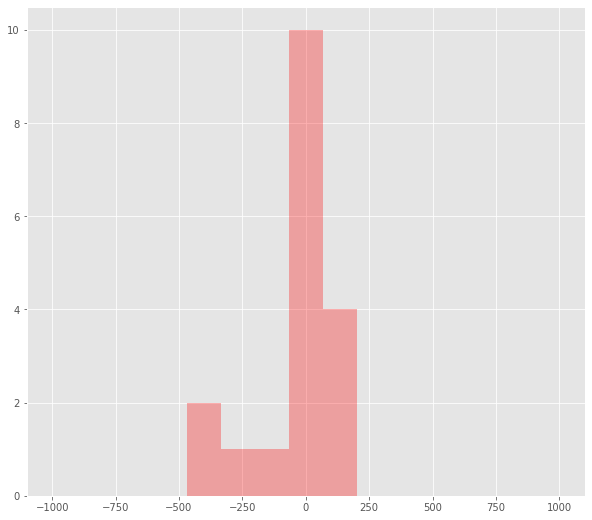

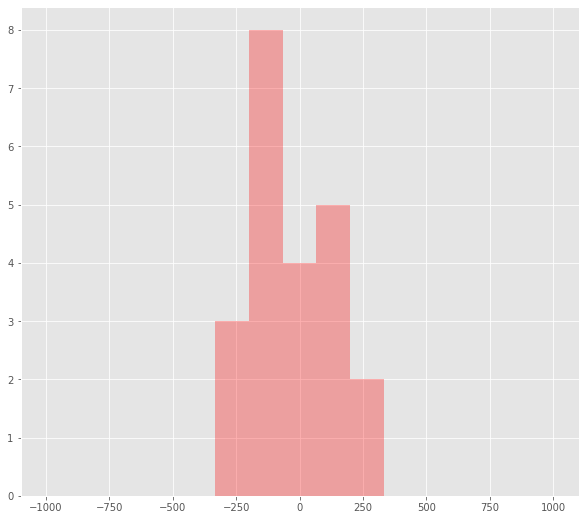

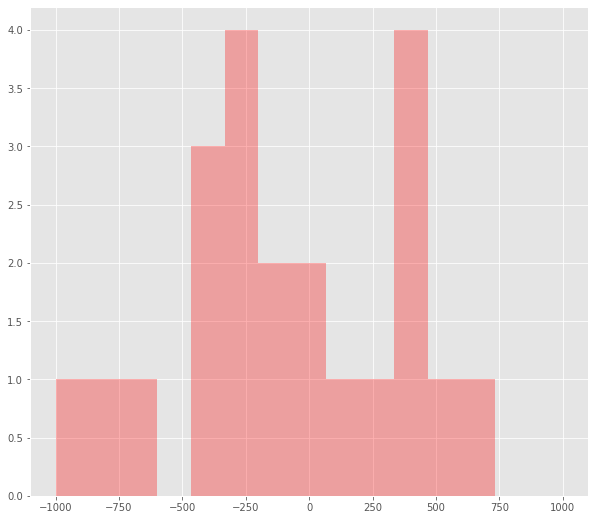

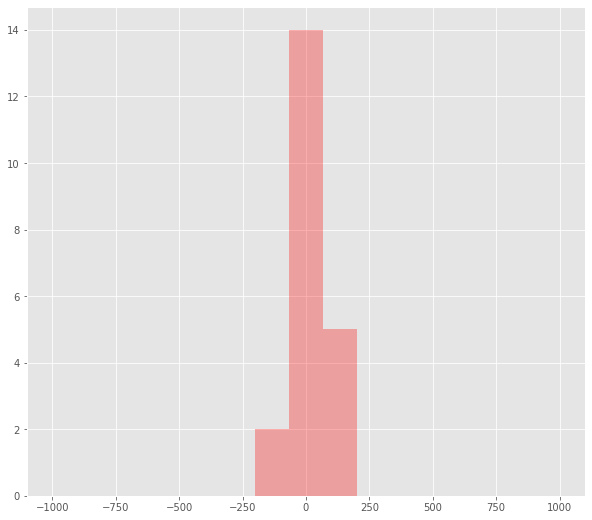

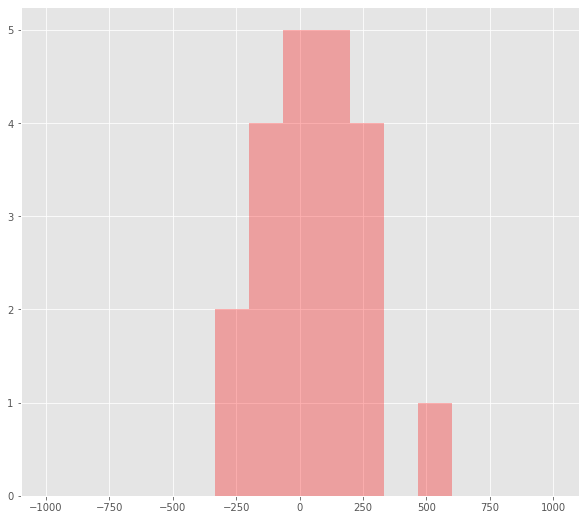

In [ ]:
date_range_list = [['2020-01', '2020-02'],
                   ['2020-02', '2020-03'],
                   ['2020-03', '2020-04'],
                   ['2020-04', '2020-05']]
stock_item_list = ['^GSPC', '^IXIC']

for start_date, end_date in date_range_list:
  for stock_item in stock_item_list:
    stock_data = pdr.data.DataReader(stock_item, 'yahoo', start_date, end_date)
    diff_between_two_days(stock_data)

In [ ]:
def change_ratio(stock_code, stock_name, start, end):
  stock_data = pdr.data.DataReader(stock_code, 'yahoo', start, end)
  pct_change = stock_data.pct_change()
  pct_change.dropna(inplace = True)
  title = str(stock_name) + 'Change of Adjusted Close Price During' + str(start)+ ' ' + str(end)
  print(pct_change['Adj Close'].describe())
  plt.hist(pct_change['Adj Close'], bins =15)
  plt.title(title)

def volume(stock_cod, stock_name, start, end):
  stock_data = pdr.data.DataReader(stock_code, 'yahoo', start, end) 
  vol = stock_data['Volume']
  title = str(stock_name) + 'Change of Volume During' + str(start)+ ' ~ ' + str(end)
  print(stock_data['Volume'].describe())
  plt.figure(facecolor = 'w')
  plt.hist(vol, range = (10e+8, 10e+9), color = 'blue')
  plt.title(title)
  plt.show()

def high_low_ratio(stock_code, stock_name, stock, end):
  stock_data = pdr.data.DataReader(stock_code, 'yahoo', start, end) 
  hl_ratio = (stock_data['High'] - stock_data['Low'])/stock_data['Adj Close']
  title = str(stock_name) + 'Change of Daily Price Range During' + str(start)+ ' ~ ' + str(end)
  print(hl_ratio.describe())
  plt.figure(facecolor = 'w')
  plt.hist(hl_ratio, color = 'green')
  plt.title(title)
  plt.show()

count    60.000000
mean     -0.000824
std       0.010319
min      -0.044163
25%      -0.002981
50%       0.001004
75%       0.004991
max       0.014980
Name: Adj Close, dtype: float64
count    6.100000e+01
mean     3.827060e+09
std      1.034037e+09
min      1.296540e+09
25%      3.456380e+09
50%      3.698170e+09
75%      3.899270e+09
max      8.563850e+09
Name: Volume, dtype: float64


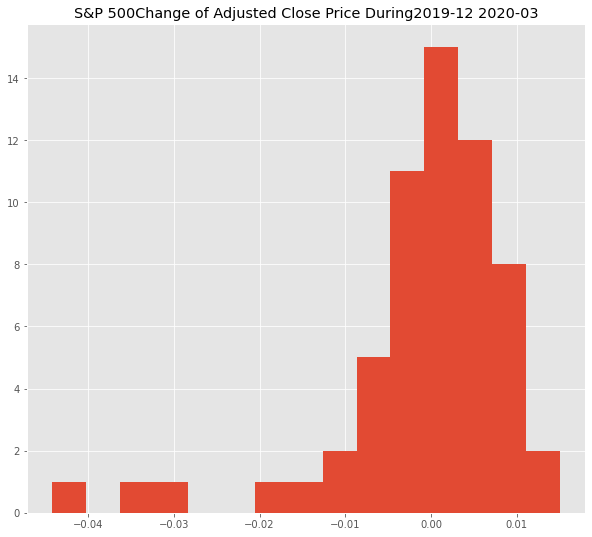

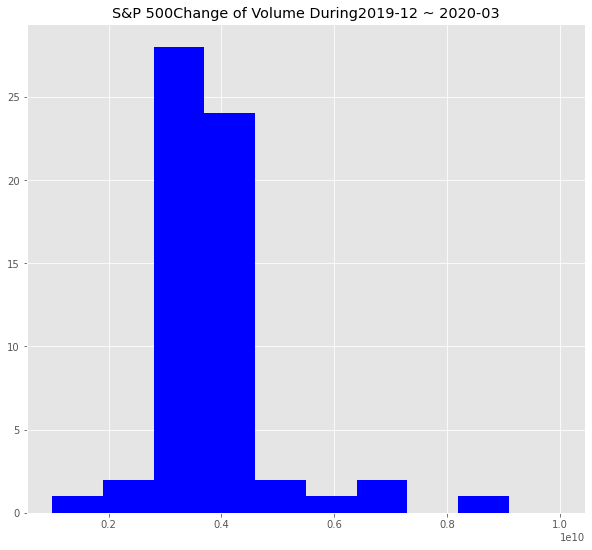

count    640.000000
mean       0.009373
std        0.007321
min        0.001456
25%        0.004741
50%        0.007140
75%        0.011080
max        0.049106
dtype: float64


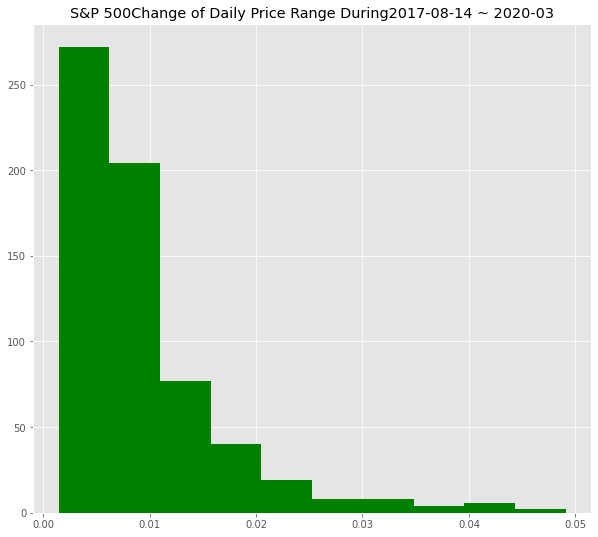

count    63.000000
mean      0.000538
std       0.037974
min      -0.119841
25%      -0.017672
50%       0.003751
75%       0.016761
max       0.093828
Name: Adj Close, dtype: float64
count    6.400000e+01
mean     6.194329e+09
std      1.246227e+09
min      3.952800e+09
25%      5.176152e+09
50%      5.846715e+09
75%      7.099310e+09
max      9.044690e+09
Name: Volume, dtype: float64


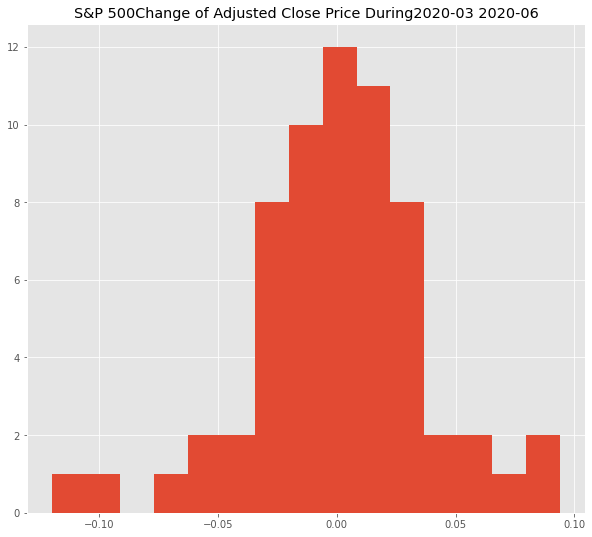

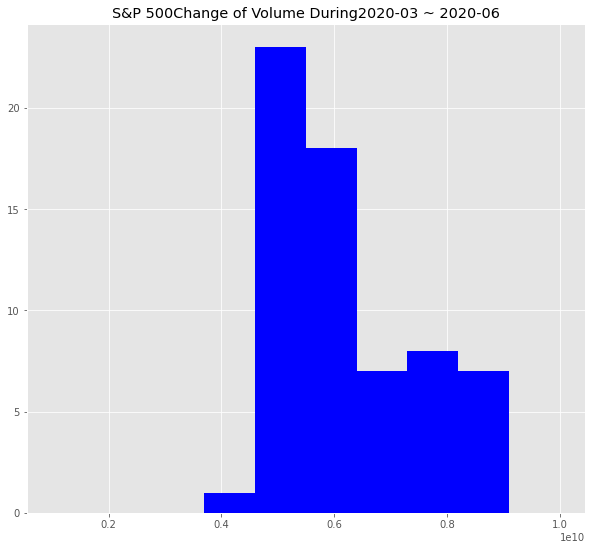

count    704.000000
mean       0.011268
std        0.010949
min        0.001456
25%        0.004936
50%        0.007775
75%        0.013088
max        0.080767
dtype: float64


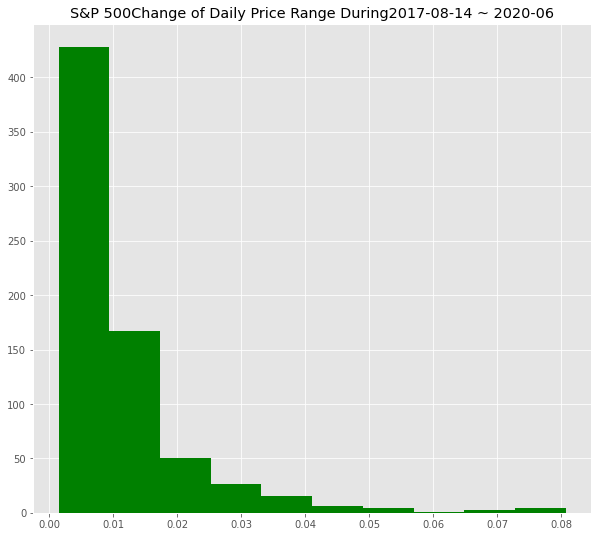

count    60.000000
mean      0.000064
std       0.011433
min      -0.046132
25%      -0.002058
50%       0.001538
75%       0.006701
max       0.020981
Name: Adj Close, dtype: float64
count    6.100000e+01
mean     2.424358e+09
std      6.199811e+08
min      3.907500e+08
25%      2.188720e+09
50%      2.378990e+09
75%      2.542170e+09
max      5.301170e+09
Name: Volume, dtype: float64


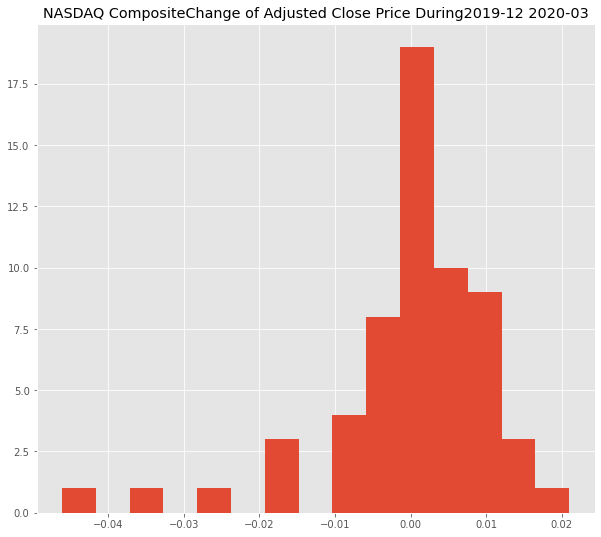

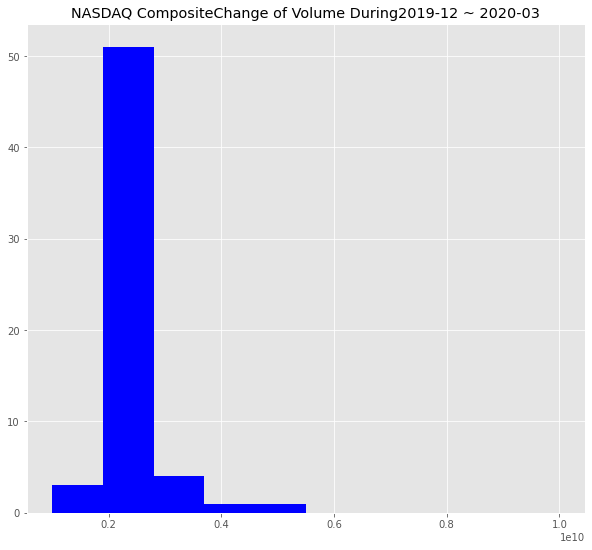

count    640.000000
mean       0.011619
std        0.008106
min        0.002177
25%        0.006208
50%        0.009060
75%        0.014031
max        0.052874
dtype: float64


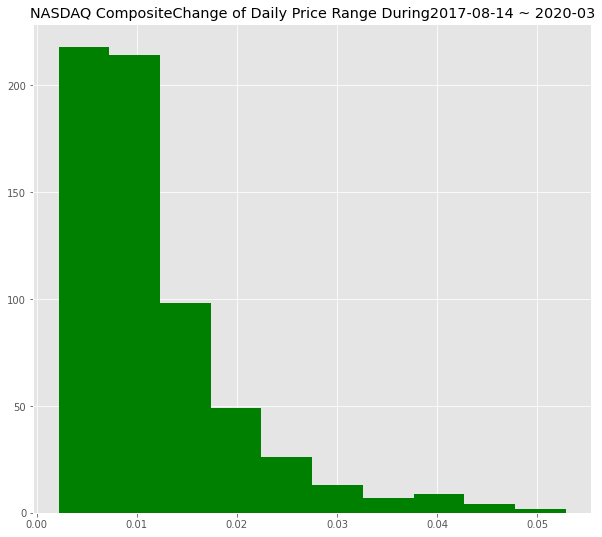

count    63.000000
mean      0.001720
std       0.037212
min      -0.123213
25%      -0.014824
50%       0.005139
75%       0.016900
max       0.093460
Name: Adj Close, dtype: float64
count    6.400000e+01
mean     3.995996e+09
std      6.434789e+08
min      4.235700e+08
25%      3.725092e+09
50%      3.997860e+09
75%      4.331712e+09
max      5.239940e+09
Name: Volume, dtype: float64


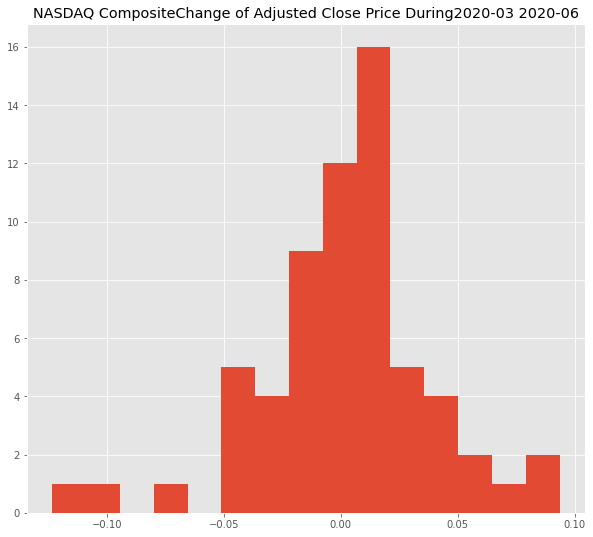

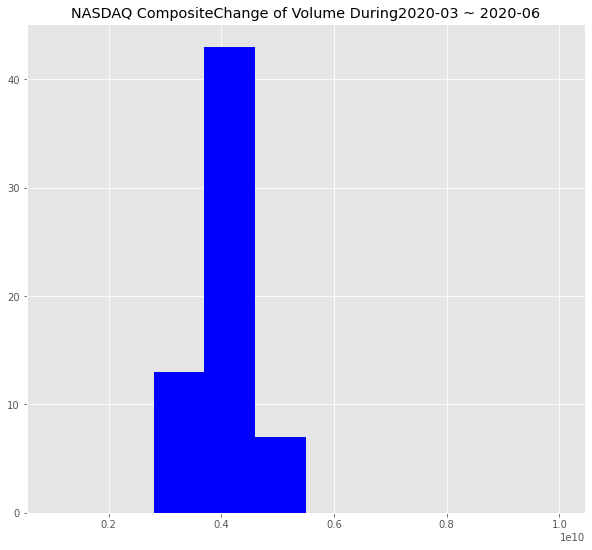

count    704.000000
mean       0.013365
std        0.011109
min        0.002177
25%        0.006503
50%        0.009962
75%        0.016212
max        0.083410
dtype: float64


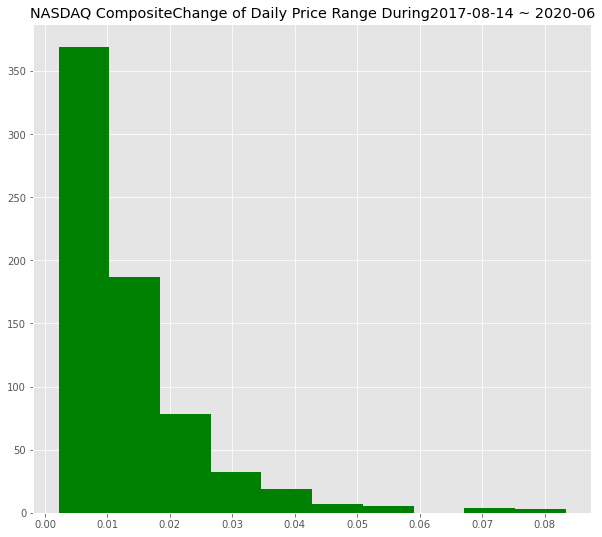

In [ ]:
date_range_list =[['2019-12', '2020-03'], ['2020-03', '2020-06']]
stock_name_list = ['S&P 500', 'NASDAQ Composite']
stock_code_list = ['^GSPC', '^IXIC']

for stock_name, stock_code in zip(stock_name_list, stock_code_list):
  for date_range in date_range_list:
    change_ratio(stock_code, stock_name, date_range[0], date_range[1])
    volume(stock_code, stock_name, date_range[0], date_range[1])
    high_low_ratio(stock_code, stock_name, date_range[0], date_range[1])
    plt.show()

### Maximum drawdown

In [ ]:
# Calculate maximum drawdown

stock_code_list = ['^GSPC', '^TNX']
stock_name_list = ['S&P 500', 'Treasury Yield 10 Years']
start = '2017-08-14'
end = '2019-08-13'

adj_close = pd.DataFrame()
pct_change = pd.DataFrame()

for stock_code, stock_name in zip(stock_code_list, stock_name_list):
  stock_data_tmp = pdr.data.DataReader(stock_code, 'yahoo', start, end)
  adj_close[stock_name] = stock_data_tmp['Adj Close']
  pct_change[stock_name] = stock_data_tmp['Adj Close'].pct_change()

adj_close.dropna(inplace=True)
pct_change.dropna(inplace=True)

def calculate_max_drawdown(adj_close, capital, stock_pct, bond_pct):
  
  stock_share = capital*(stock_pct/100)/adj_close['S&P 500'][0]
  bond_share = capital*(bond_pct/100)/adj_close['Treasury Yield 10 Years'][0]

  stock_cummax = (adj_close['S&P 500']*stock_share).cummax()
  bond_cummax = (adj_close['Treasury Yield 10 Years']*bond_share).cummax()
  portfolio_cummax = (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share).cummax()

  stock_delta_max = stock_cummax - (adj_close['S&P 500']*stock_share)
  bond_delta_max = bond_cummax - (adj_close['Treasury Yield 10 Years']*bond_share)
  portfolio_delta_max = portfolio_cummax - (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share)

  stock_delta_max_idx = stock_delta_max.idxmax()
  bond_delta_max_idx = bond_delta_max.idxmax()
  portfolio_delta_max_idx = portfolio_delta_max.idxmax()

  stock_max_drawdown = stock_delta_max.loc[stock_delta_max_idx]/stock_cummax.loc[stock_delta_max_idx]*100
  bond_max_drawdown = bond_delta_max.loc[bond_delta_max_idx]/bond_cummax.loc[bond_delta_max_idx]*100
  portfolio_max_drawdown = portfolio_delta_max.loc[portfolio_delta_max_idx]/portfolio_cummax.loc[portfolio_delta_max_idx]*100  

  print('='*60)
  print('The maximum drawdown for S&P 500 is {:.2f}%'.format(stock_max_drawdown))
  print('The maximum drawdown for bond is {:.2f}%'.format(bond_max_drawdown))
  print('The maximum drawdown for this portfolio is {:.2f}%'.format(portfolio_max_drawdown))
  print('='*60, '\n')

In [ ]:
# Plot widely used technical indicators

start = '2017-08-14'
end = '2019-08-13'
target_stock = 'BAC'

def plot_ma(stock_data):
  ma_20 = stock_data['Adj Close'].rolling(window=20).mean()
  ma_60 = stock_data['Adj Close'].rolling(window=60).mean()

  plt.close()
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.plot(stock_data['Adj Close'], color='darkred', linewidth=2)
  ax.plot(ma_20, color='darkblue', linewidth=2)
  ax.plot(ma_60, color='darkgreen', linewidth=2)
  ax.set_title('Moving Average', fontsize=16)
  ax.set_xlabel('Date', fontsize=14)
  ax.set_ylabel('Price', fontsize=14)
  ax.legend(['Daily Adjusted Close Price', '20 Moving Average', '60 Moving Average'], fontsize=11)
  plt.show()
  plt.close()

def plot_bollinger_band(stock_data, window, multiplier):
  # For the case of split
  adj_high = stock_data['Adj Close']*(stock_data['High']/stock_data['Close'])
  adj_low = stock_data['Adj Close']*(stock_data['Low']/stock_data['Close'])
  typ_price = (adj_high+stock_data['Adj Close']+adj_low)/3
  typ_price_ma_20 = typ_price.rolling(window=window).mean()
  typ_price_std = typ_price.rolling(window=window).std()

  bolu = typ_price + multiplier*typ_price_std
  boll = typ_price - multiplier*typ_price_std
  bolu.dropna(inplace=True)
  boll.dropna(inplace=True)

  plt.close()
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.plot(stock_data['Adj Close'], color='darkred', linewidth=1.5)
  ax.fill_between(bolu.index, bolu, boll, color='lightgreen', alpha=0.2)
  ax.plot(bolu, color='green', linewidth=1)
  ax.plot(boll, color='green', linewidth=1)
  ax.set_title('Moving Average', fontsize=16)
  ax.set_xlabel('Date', fontsize=14)
  ax.set_ylabel('Price', fontsize=14)
  ax.legend(['Daily Adjusted Close Price', 'Bollinger Band'], fontsize=11)
  plt.show()
  plt.close()

In [ ]:
# Calculate maximum drop in pct

def calculate_pct_change(adj_close, capital, stock_pct, bond_pct):
  stock_share = capital*(stock_pct/100)/adj_close['S&P 500'][0]
  bond_share = capital*(bond_pct/100)/adj_close['Treasury Yield 10 Years'][0]

  stock_max_daily_drop = (adj_close['S&P 500']*stock_share).pct_change().min()*100
  bond_max_daily_drop = (adj_close['Treasury Yield 10 Years']*bond_share).pct_change().min()*100
  portfolio_max_daily_drop = (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share).pct_change().min()*100

  stock_max_drop_idx = (adj_close['S&P 500']*stock_share).pct_change().idxmin()
  bond_max_drop_idx = (adj_close['Treasury Yield 10 Years']*bond_share).pct_change().idxmin()
  portfolio_max_drop_idx = (adj_close['Treasury Yield 10 Years']*bond_share + adj_close['S&P 500']*stock_share).pct_change().idxmin()

  print('='*60)
  print('The maximum daily drop for S&P 500 is {:.2f}%, which happend in {}'.format(stock_max_daily_drop, stock_max_drop_idx))
  print('The maximum daily drop for bond is {:.2f}%, which happend in {}'.format(bond_max_daily_drop, bond_max_drop_idx))
  print('The maximum daily drop for this portfolio is {:.2f}%, which happend in {}'.format(portfolio_max_daily_drop, portfolio_max_drop_idx))
  print('='*60, '\n')

In [ ]:
capital = 10000
ratio_list = [[80,20], [60,40], [50,50], [40,60], [20, 80]]

for stock_pct, bond_pct in ratio_list:
  calculate_max_drawdown(adj_close, capital, stock_pct, bond_pct)

The maximum drawdown for S&P 500 is 17.54%
The maximum drawdown for bond is 49.32%
The maximum drawdown for this portfolio is 16.99%

The maximum drawdown for S&P 500 is 17.54%
The maximum drawdown for bond is 49.32%
The maximum drawdown for this portfolio is 22.40%

The maximum drawdown for S&P 500 is 17.54%
The maximum drawdown for bond is 49.32%
The maximum drawdown for this portfolio is 27.37%

The maximum drawdown for S&P 500 is 17.54%
The maximum drawdown for bond is 49.32%
The maximum drawdown for this portfolio is 32.14%

The maximum drawdown for S&P 500 is 17.54%
The maximum drawdown for bond is 49.32%
The maximum drawdown for this portfolio is 41.07%

